In [1]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess MNIST data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Model definition
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Save the model
# model.save('/Users/behnam/python-projects/Neural Network/Computer Vision/Image Classification/Model_Fitting')


2024-01-25 18:34:23.940325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1500/1500 [==============================] - 23s 14ms/step - loss: 0.1665 - accuracy: 0.9478 - val_loss: 0.0612 - val_accuracy: 0.9797
Epoch 2/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0473 - val_accuracy: 0.9856
Epoch 3/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0428 - val_accuracy: 0.9868
Epoch 4/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.0345 - val_accuracy: 0.9906
Epoch 5/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0541 - val_accuracy: 0.9868
Epoch 6/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0343 - val_accuracy: 0.9909
Epoch 7/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0416 -

In [13]:
# Assuming you have an image in a directory for prediction
image_path = '/Users/behnam/python-projects/Neural Network/Computer Vision/Image Classification/Image_of_handwriting/Image7.png'  # Update with your actual image path

def preprocess_image(file_path):
    # Image preprocessing to match the MNIST training data
    img = Image.open(file_path).convert('L')
    img_resized = img.resize((28, 28))
    img_array = np.array(img_resized).astype('float32') / 255.0
    img_array = img_array.reshape((1, 28, 28, 1))
    return img_array

def predict_image(img_array):
    # Predict the class of the image
    prediction = model.predict(img_array)
    return np.argmax(prediction)

# Preprocess the image
img_array = preprocess_image(image_path)

# Predict the digit
predicted_digit = predict_image(img_array)

print(f"The image is predicted to be a '{predicted_digit}'.")

1/1 [==============================] - 0s 22ms/step
The image is predicted to be a '8'.


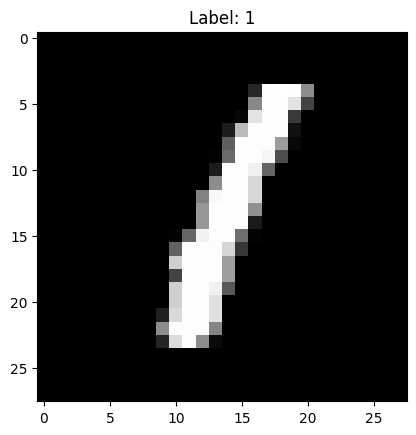

In [23]:
import matplotlib.pyplot as plt 

# Load MNIST data
(train_images, train_labels), _ = mnist.load_data()

# Define the index of the image you want to view
index = 2  # For example, to view the first image in the dataset

# Display the image at the specified index
plt.imshow(train_images[index], cmap='gray')
plt.title(f'Label: {train_labels[index]}')
plt.show()

# If you need to preprocess the image for prediction, make sure to squeeze the unnecessary dimensions
#img_array = train_images[index].reshape(1, 28, 28, 1)  # Add batch dimension for model prediction
# When displaying this image, you should remove the batch dimension and channel dimension
#plt.imshow(img_array.squeeze(), cmap='gray')  # Use .squeeze() to remove single-dimensional entries
#plt.title(f'Label: {train_labels[index]}')
#plt.show()